In [31]:
import pandas as pd

In [32]:
df_comments = pd.read_csv('comment.csv', sep = ';')

In [33]:
df_comments['количество'] = 1

In [34]:
print(df_comments.shape)
df_comments.head()

(21726, 18)


,Ссылка,Текст,Тип,Автор,Ссылка на автора,Дата,Лайков,Комментариев,Репостов,Переходов,Просмотров вики страницы,Просмотров,Лайков / Просмотров,Комментариев / Просмотров,Репостов / Просмотров,Переходов / Просмотров,Просмотров вики страницы / Просмотров поста,количество
0,https://vk.com/wall-90073220_22795,Ростовская набережная,Комментарий,Сергей Иванов,https://vk.com/id140490416,11:08 06.08.2021,0,0,0,0,0,0,0%,0%,0%,0%,0%,1
1,https://vk.com/wall-90073220_22765,А ещё газировка за три копейки в автоматах был...,Комментарий,Владимир Золотов,https://vk.com/id8741729,21:47 02.08.2021,0,0,0,0,0,0,0%,0%,0%,0%,0%,1
2,https://vk.com/wall-90073220_22763,А офтальмолога там можно пройти ?,Комментарий,Наталья Тамаркова,https://vk.com/id170350338,17:57 02.08.2021,0,0,0,0,0,0,0%,0%,0%,0%,0%,1
3,https://vk.com/wall-76436019_31434,"[id86250766|Ольга], похоже на правду 😀",Комментарий,"Арбат - Смоленская - Кропоткинская, прививайся!",https://vk.com/club76436019,15:39 06.08.2021,0,0,0,0,0,0,0%,0%,0%,0%,0%,1
4,https://vk.com/wall-76436019_31433,1967 (1917+50),Комментарий,Ольга Кольцова,https://vk.com/id86250766,15:31 06.08.2021,1,0,0,0,0,0,0%,0%,0%,0%,0%,1


In [35]:
df_comments['Ссылка на автора'].nunique()

7492

In [36]:
# Создание сводной таблицей по 'Сыылка на автора', считает количество написааных коментариев каждым автором
pivot_authors = pd.pivot_table(df_comments, index = 'Ссылка на автора', values = 'количество', aggfunc='count')

In [37]:
print(pivot_authors.shape)
pivot_authors.head(10)

(7492, 1)


,количество
Ссылка на автора,
https://vk.com/club104198445,2
https://vk.com/club109970366,1
https://vk.com/club114354,16
https://vk.com/club119177,171
https://vk.com/club123868781,1
https://vk.com/club12944620,1
https://vk.com/club130738612,1
https://vk.com/club131437928,2
https://vk.com/club1405710,18


In [38]:
# Создаем df_ID из файла ID.xlsx 
df_ID = pd.read_excel('ID.xlsx')

In [39]:
df_ID.head()

,ID,Ссылка,Название,Участников,"Тип (Паблик, группа...)","Тип (Открытое, закрытое...)",Лайков,Репостов,Комментариев,Постов,Активностей на пост,ER
0,47929,https://vk.com/4ertanovo,✖✖✖ ЧЕРТАНОВО ✖✖✖,56908,Публичная страница,Открытое,35296,1691,7244,120,368.59,0.1859
1,82215281,https://vk.com/look_tushino,Тушино Навсегда,52983,Публичная страница,Открытое,4019,421,3230,1134,6.76,0.0314
2,39349482,https://vk.com/vbutovo,В Бутово,43671,Публичная страница,Открытое,12488,753,6835,417,48.14,0.1138
3,59325662,https://vk.com/podslushanovtushino,Подслушано в Тушино,39249,Публичная страница,Открытое,13034,628,14165,606,45.92,0.1356
4,129153272,https://vk.com/tipzelenograd,Типичный Зеленоград,0,Публичная страница,Открытое,0,0,0,0,0.00,0.0000


In [40]:
#Создадние ДатаФрейма df_ID_short из df_ID состоящего только из двух столбцов 'ID' и 'Название'
df_ID_short = df_ID[['ID', 'Название']]

In [41]:
print(df_ID_short.shape)
df_ID_short.head()

(894, 2)


,ID,Название
0,47929,✖✖✖ ЧЕРТАНОВО ✖✖✖
1,82215281,Тушино Навсегда
2,39349482,В Бутово
3,59325662,Подслушано в Тушино
4,129153272,Типичный Зеленоград


In [42]:
# добавляем столбец 'Ссылка' в df_ID_short по этому столбцу будем искать пересечения в pivot_authors
df_ID_short['Ссылка'] = ('https://vk.com/club' + df_ID_short['ID'].astype(str))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
df_ID_short.head()

,ID,Название,Ссылка
0,47929,✖✖✖ ЧЕРТАНОВО ✖✖✖,https://vk.com/club47929
1,82215281,Тушино Навсегда,https://vk.com/club82215281
2,39349482,В Бутово,https://vk.com/club39349482
3,59325662,Подслушано в Тушино,https://vk.com/club59325662
4,129153272,Типичный Зеленоград,https://vk.com/club129153272


In [44]:
# создание df_merged в него входят совпадения из df_ID_short['Ссылка'] в pivot_authors['Ссылка на автора']
df_merged = pd.merge(df_ID_short, pivot_authors, left_on='Ссылка', right_on = 'Ссылка на автора', how = 'inner')

In [45]:
print(df_merged.shape)
df_merged.tail()

(115, 4)


,ID,Название,Ссылка,количество
110,68481341,Молжаниново и Подрезково,https://vk.com/club68481341,29
111,90107439,Московский. [Самая] Новая Москва,https://vk.com/club90107439,25
112,68425462,Проспект Мира. ЦАО. Мещанский,https://vk.com/club68425462,20
113,73994693,Красносельский район,https://vk.com/club73994693,7
114,68440669,Восточный | Янтарный | Балашиха | ВАО,https://vk.com/club68440669,34


In [46]:
# сохраняем df_merged в excel файл с названием comments_count.xlsx в папку task3_output
df_merged.drop(columns= ['ID']).to_excel('task3_output\comments_count.xlsx', index = False)

#ГистоГрамма
top20


In [47]:
# Создание df_top20 из df_merged топ 20 по убыванию столбца 'количество'
df_top20 = df_merged.nlargest(20, 'количество')

In [48]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.figure as fig

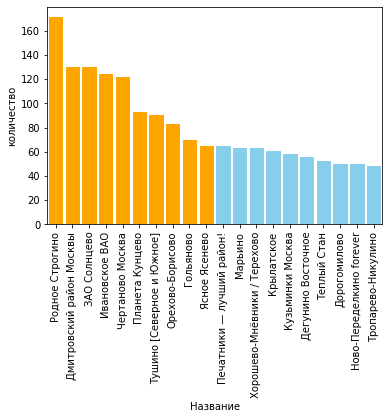

In [49]:
# Строим bar plot из df_top20, выделяем топ 10 цветом

top_10 = list(df_top20.nlargest(10, 'количество')['Название'])

bar_plot = sns.barplot(data = df_top20, x = 'Название', y = 'количество' )

for bar in bar_plot.patches:
    if bar.get_x() <= 9:
        bar.set_color('orange')    
    else:
        bar.set_color('skyblue')

#bar_plot.patches[0:9].set_facecolor('orange')
#bar_plot.patches[0].set_facecolor('salmon')


plt.xticks(rotation=90)
plt.savefig('task3_output\comments_hist.png')
plt.show()


In [50]:
#plt.savefig('comments_hist.png')